In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

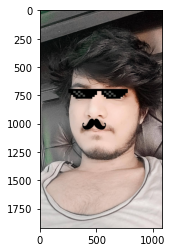

In [10]:
eyesdetector = cv2.CascadeClassifier("frontalEyes35x16.xml")
mostdetector = cv2.CascadeClassifier("Nose18x15.xml")

fullimg=cv2.imread("upc.jpeg")
plt.imshow(fullimg)
fullimg=cv2.cvtColor(fullimg,cv2.COLOR_BGR2RGB)
overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

mostache=cv2.imread("mustache.png",-1)
mostache=cv2.cvtColor(mostache,cv2.COLOR_BGRA2RGBA)
eyes=eyesdetector.detectMultiScale(fullimg,1.1,15)

x,y,w,h=eyes[0]

overlay=cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)
mts=mostdetector.detectMultiScale(fullimg,1.5,15)
overlay=cv2.resize(overlay,(w,h))

for i in range(overlay.shape[0]):
    for j in range(overlay.shape[1]):
        if(overlay[i,j,3]>0):
            fullimg[y+i,x+j,:]=overlay[i,j,:-1]
x,y,w,h=mts[0]
y = y+int(h/2)
mostache=cv2.resize(mostache,(w,h))

for i in range(mostache.shape[0]):
    for j in range(mostache.shape[1]):
        if(mostache[i,j,3]>0):
            fullimg[y+i,x+j,:]=mostache[i,j,:-1]
plt.imshow(fullimg)
plt.show()
fullimg = fullimg.reshape((-1,3))
df = pd.DataFrame(fullimg, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)